#Day14. 데이터수집 및 전처리

---





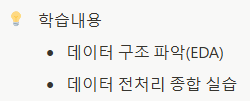

##**데이터 구조 파악 (EDA, 탐색적 데이터 분석, Exploratory Data Analysis)**

데이터 분석을 수행하기 전에 **데이터의 구조를 파악하고 특성을 이해하는 과정**  
EDA를 통해 데이터의 패턴 발견, 이상치(outlier) 및 결측치(missing value) 확인, 적절한 전처리 방법 결정  
EDA는 **기술통계, 데이터 시각화, 변수 간 관계 분석** 등의 방법을 사용

**1. EDA의 주요 목적**

1. **데이터의 기본 정보 파악**: 데이터 크기, 컬럼 수, 데이터 타입 등을 확인
2. **결측치 및 이상치 탐색**: 누락된 값과 비정상적인 값을 찾아 적절한 처리 방안을 결정
3. **기술통계를 이용한 데이터 요약**: 평균, 중앙값, 표준편차 등 주요 통계량을 분석
4. **데이터의 분포 확인**: 데이터가 정규분포를 따르는지 여부 등을 시각적으로 확인
5. **변수 간 관계 분석**: 변수 간 상관관계를 분석하여 데이터의 패턴을 이해

**2. 데이터의 기본 정보 확인**

EDA의 첫 단계는 **데이터의 기본 구조를 확인하는 것**  
데이터셋을 불러오고, 데이터의 크기, 컬럼명, 데이터 타입을 확인하는 것이 중요

In [2]:
import pandas as pd

# 데이터 로드 (예제 데이터)
df = pd.read_csv("sample_data.csv")

# 데이터 크기 확인 (행, 열 개수)
print(f"데이터 크기: {df.shape}")

# 컬럼명 확인
print(f"컬럼명: {df.columns.tolist()}")

# 데이터 타입 확인
print(df.info())

# 상위 5개 행 출력
print(df.head())

데이터 크기: (1000, 6)
컬럼명: ['ID', '이름', '나이', '성별', '소득', '구매횟수']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1000 non-null   int64  
 1   이름      1000 non-null   object 
 2   나이      980 non-null    float64
 3   성별      1000 non-null   object 
 4   소득      950 non-null    float64
 5   구매횟수    1000 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB
None
   ID    이름    나이  성별            소득  구매횟수
0   1  사용자1  56.0  남성  4.975366e+06    11
1   2  사용자2  69.0  남성  6.782590e+06    17
2   3  사용자3  46.0  남성  8.790399e+06    17
3   4  사용자4  32.0  여성  4.203697e+06     6
4   5  사용자5  60.0  남성  4.265841e+06     5


**3. 결측치 및 이상치 탐색**

In [3]:
# 각 컬럼별 결측치 개수 확인
print(df.isnull().sum())

ID       0
이름       0
나이      20
성별       0
소득      50
구매횟수     0
dtype: int64


**결측치 처리 방법**

1. **삭제**: 데이터 수가 많고 결측치가 적다면 해당 행을 삭제
2. **대체**:
    - 수치형 데이터 → 평균, 중앙값, 최빈값으로 채우기
    - 범주형 데이터 → 최빈값으로 채우기
    - KNN이나 회귀모델을 사용하여 예측 값으로 대체 가능

In [4]:
# 평균으로 대체
df['나이'] = df['나이'].fillna(df['나이'].mean())

# 최빈값으로 대체
df['소득'] = df['소득'].fillna(df['소득'].median())

**이상치 탐색**

이상치는 데이터를 왜곡할 수 있기 때문에 제거하거나 조정해야 함

**이상치 탐색 방법**

1. **박스플롯(Box Plot) 활용**: 사분위수를 기반으로 이상치 탐색
2. **Z-score 활용**: 데이터가 평균에서 얼마나 벗어났는지 확인

In [8]:
!pip install koreanize_matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.7 MB/s eta 0:00:00


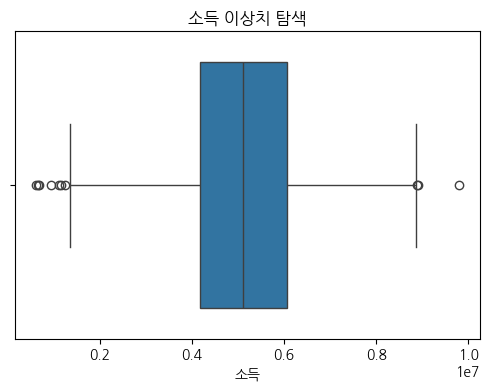

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯으로 이상치 확인
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['소득'])
plt.title("소득 이상치 탐색")
plt.show()

**Z-score 활용**

In [11]:
from scipy import stats

# Z-score 계산
df["소득_Z"] = stats.zscore(df["소득"])

# Z-score가 3 이상인 데이터 조회
outliers = df[df["소득_Z"].abs() > 3]
display(outliers)

,ID,이름,나이,성별,소득,구매횟수,소득_Z
223,224,사용자224,66.0,남성,6.556169e+05,4,-3.082796
661,662,사용자662,62.0,남성,6.916067e+05,9,-3.057970
713,714,사용자714,43.0,여성,6.179743e+05,5,-3.108762
737,738,사용자738,49.0,남성,9.789661e+06,1,3.217914


**4. 데이터 분포 확인**

**히스토그램을 이용한 데이터 분포 확인**

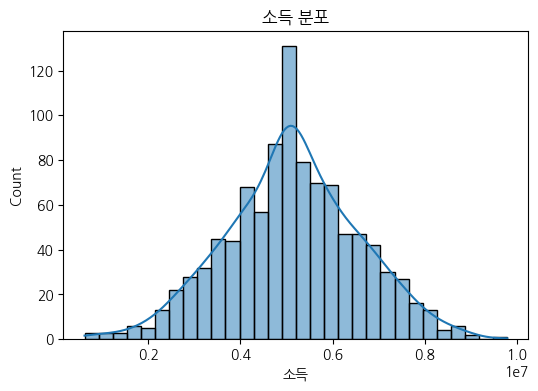

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df["소득"], bins=30, kde=True)
plt.title("소득 분포")
plt.show()

- 데이터가 정규분포를 따르는지 확인 가능

**QQ-Plot을 이용한 정규성 확인**

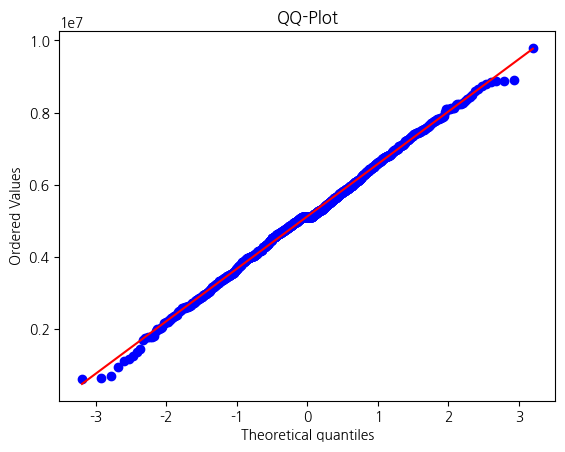

In [13]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

stats.probplot(df["소득"].dropna(), dist="norm", plot=plt)
plt.title("QQ-Plot")
plt.show()

- 점들이 직선에 가까우면 정규성을 띄고 있음을 의미

**5. 변수 간 관계 분석**

변수 간 관계를 확인하면 데이터의 패턴을 파악하는 데 도움이 됩니다.

**상관계수 계산**

In [18]:
# 수치형 변수 간의 상관계수 확인
correlation_matrix = df.select_dtypes(include=[float, int]).corr()
display(correlation_matrix)

,ID,나이,소득,구매횟수,소득_Z
ID,1.000000,-0.012676,-0.053345,-0.012520,-0.053345
나이,-0.012676,1.000000,0.020753,0.000951,0.020753
소득,-0.053345,0.020753,1.000000,-0.000787,1.000000
구매횟수,-0.012520,0.000951,-0.000787,1.000000,-0.000787
소득_Z,-0.053345,0.020753,1.000000,-0.000787,1.000000


**상관 행렬 히트맵 시각화**

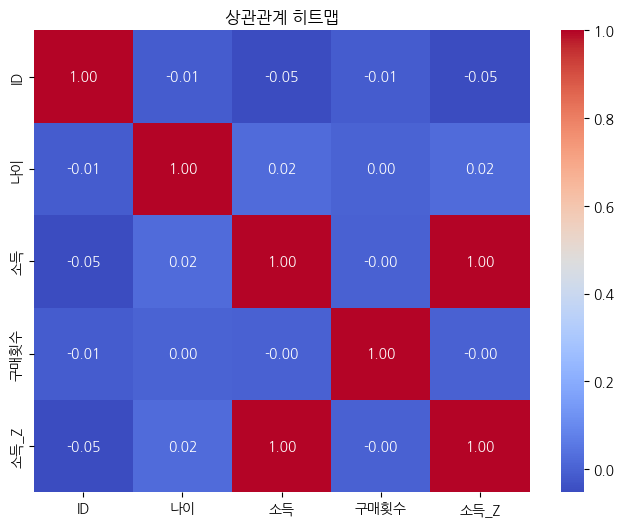

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("상관관계 히트맵")
plt.show()

- 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계를 가짐

**6. 변수 간 관계 시각화**

**산점도를 활용한 관계 분석**

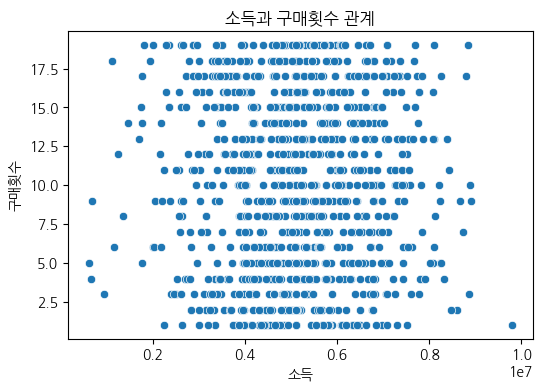

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["소득"], y=df["구매횟수"])
plt.xlabel("소득")
plt.ylabel("구매횟수")
plt.title("소득과 구매횟수 관계")
plt.show()

- 점들이 특정 패턴을 보이면 두 변수 간 관계가 있다고 볼 수 있음

**범주형 변수 분석**

범주형 변수(예: 성별)와 수치형 변수(예: 구매금액)의 관계를 분석할 때 `박스플롯`을 활용할 수 있음

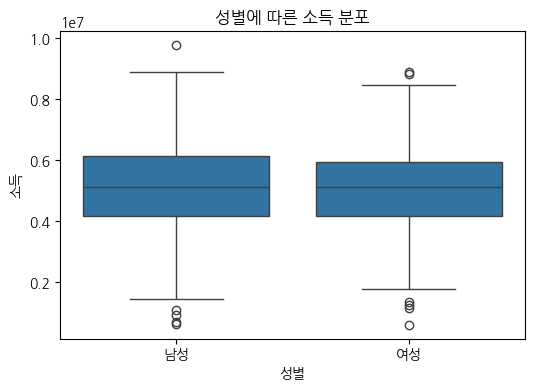

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["성별"], y=df["소득"])
plt.title("성별에 따른 소득 분포")
plt.show()

**7. 데이터 정리 및 이상치 제거**

EDA를 통해 발견한 문제들을 해결하기 위해 데이터 정리

In [22]:
# 이상치 제거 (소득이 Z-score 3 초과인 데이터 제거)
df_cleaned = df[df["소득_Z"].abs() <= 3]

# 필요 없는 컬럼 제거 (Z-score 컬럼 삭제)
df_cleaned.drop(columns=["소득_Z"], inplace=True)

print(df_cleaned.info())  # 데이터 정리 후 구조 확인

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      996 non-null    int64  
 1   이름      996 non-null    object 
 2   나이      996 non-null    float64
 3   성별      996 non-null    object 
 4   소득      996 non-null    float64
 5   구매횟수    996 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 54.5+ KB
None


<ipython-input-22-137def4a534d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=["소득_Z"], inplace=True)


EDA는 데이터 분석의 필수적인 과정으로, **데이터의 구조를 파악하고 문제점을 사전에 해결**하는 데 중요한 역할을 함  
**기술통계, 시각화, 상관관계 분석** 등을 활용하면 데이터에 대한 깊은 통찰을 얻을 수 있음

EDA를 철저히 수행하면 더 나은 예측 모델을 만들고, 데이터 기반 의사 결정을 더욱 신뢰할 수 있게 됨



---

## **그로스 마케팅(Growth Marketing) 관점에서 EDA를 활용한 데이터 분석**



그로스 마케팅에서는 데이터를 기반으로 **고객 행동 분석**, **전환율 최적화**, **마케팅 ROI 분석** 등을 수행해야 함

EDA(탐색적 데이터 분석)를 통해 **고객의 행동 패턴을 시각적으로 분석하고 인사이트를 도출**하는 것이 중요

**1. EDA를 활용한 그로스 마케팅 분석 시나리오**

그로스 마케팅에서는 다양한 KPI(핵심 성과 지표)를 분석해야 함

아래는 마케팅에서 중요한 **5가지 분석 항목과 활용 가능한 그래프**

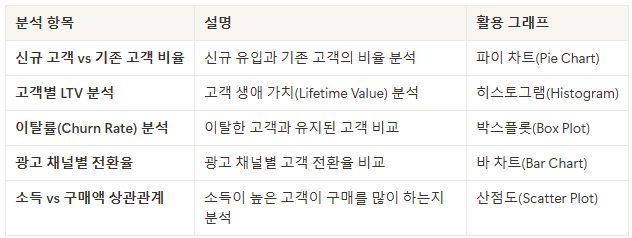

**2. 분석 시나리오**  

**시나리오 개요**  
한 온라인 쇼핑몰에서 고객 데이터를 활용하여 그로스 마케팅 전략을 개선하고자 함  
특히, 신규 고객의 행동 패턴을 파악하고, 충성 고객을 분석하여 **재구매율을 높이는 전략**을 세우려 함

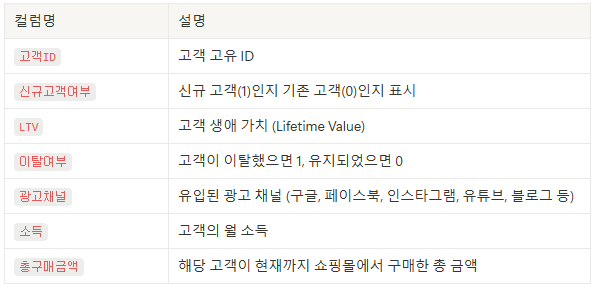

**3. EDA를 위한 시각화 코드**

In [23]:
!pip install koreanize-matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 랜덤 시드 고정
np.random.seed(42)

# 데이터 크기 설정
num_customers = 1000

# 고객 데이터 생성
df = pd.DataFrame({
    "고객ID": range(1, num_customers + 1),
    "신규고객여부": np.random.choice([0, 1], size=num_customers, p=[0.7, 0.3]),  # 70% 기존, 30% 신규
    "LTV": np.random.exponential(scale=50000, size=num_customers),  # 고객 생애 가치(Lifetime Value)
    "이탈여부": np.random.choice([0, 1], size=num_customers, p=[0.8, 0.2]),  # 80% 유지, 20% 이탈
    "광고채널": np.random.choice(["구글", "페이스북", "인스타그램", "유튜브", "블로그"], size=num_customers),
    "소득": np.random.normal(loc=5000000, scale=1500000, size=num_customers),  # 월 소득
    "총구매금액": np.random.normal(loc=1000000, scale=500000, size=num_customers)  # 총 구매 금액
})

# 일부 데이터 정리
df["소득"] = np.abs(df["소득"])  # 음수 방지
df["총구매금액"] = np.abs(df["총구매금액"])  # 음수 방지

In [24]:
display(df)

,고객ID,신규고객여부,LTV,이탈여부,광고채널,소득,총구매금액
0,1,0,10236.514096,0,인스타그램,5.424183e+06,8.067724e+05
1,2,1,39033.492308,0,구글,4.563934e+06,1.453283e+06
2,3,1,103157.089714,1,블로그,6.045598e+06,3.584275e+05
3,4,0,65880.388957,0,인스타그램,4.641250e+06,1.658641e+06
4,5,0,82139.691304,0,페이스북,3.065352e+06,1.446125e+06
...,...,...,...,...,...,...,...
995,996,0,53494.705031,1,인스타그램,5.107645e+06,1.873196e+06
996,997,1,156881.639298,0,블로그,4.375018e+06,8.673073e+05
997,998,0,3572.545375,0,구글,4.610229e+06,1.603911e+06
998,999,1,2937.351341,0,구글,7.375067e+06,1.653639e+06


**4. 데이터 분석 및 그래프 시각화**

**1) 신규 고객 vs 기존 고객 비율 분석 (파이 차트)**

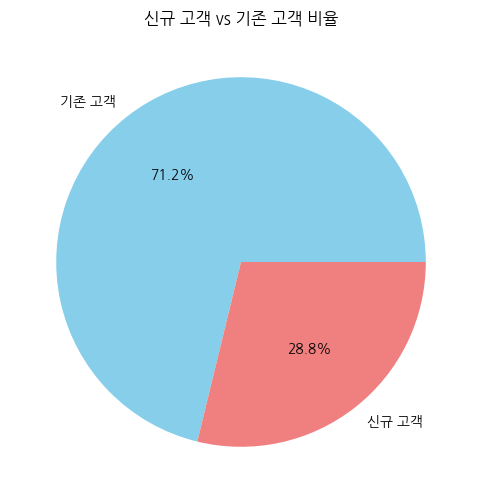

In [25]:
plt.figure(figsize=(6, 6))
df["신규고객여부"].value_counts().plot.pie(autopct="%.1f%%", labels=["기존 고객", "신규 고객"], colors=["skyblue", "lightcoral"])
plt.title("신규 고객 vs 기존 고객 비율")
plt.ylabel("")
plt.show()

**활용 인사이트**
- 신규 고객이 차지하는 비율을 확인하고, 고객 확보 전략을 개선하는 데 활용

**2) 고객별 LTV 분포 (히스토그램)**

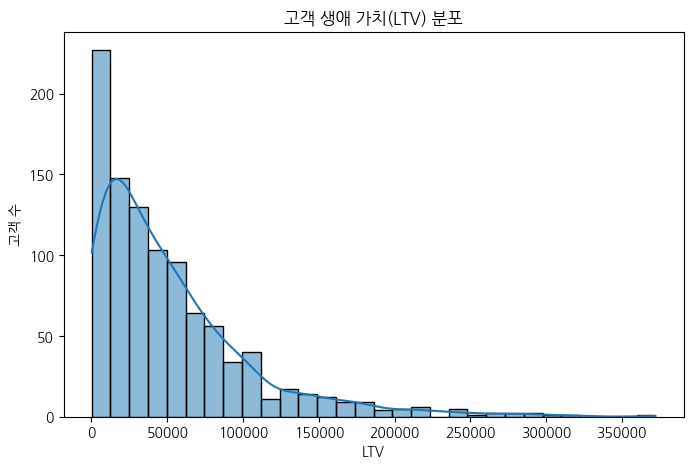

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df["LTV"], bins=30, kde=True)
plt.title("고객 생애 가치(LTV) 분포")
plt.xlabel("LTV")
plt.ylabel("고객 수")
plt.show()

**활용 인사이트**
- LTV가 높은 고객에게 추가적인 마케팅 비용을 투자하여 **VIP 고객을 확보**할 수 있음

**3) 고객 이탈률 분석 (박스플롯)**

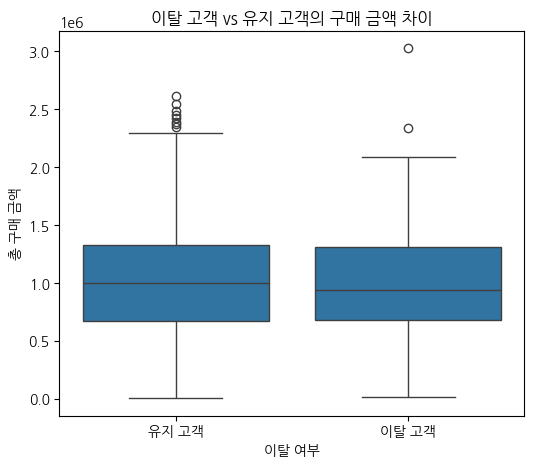

In [27]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df["이탈여부"], y=df["총구매금액"])
plt.xticks([0, 1], ["유지 고객", "이탈 고객"])
plt.title("이탈 고객 vs 유지 고객의 구매 금액 차이")
plt.xlabel("이탈 여부")
plt.ylabel("총 구매 금액")
plt.show()

**활용 인사이트**
- 이탈 고객이 평균적으로 구매액이 낮다면 **이탈을 방지하기 위한 리텐션 마케팅**이 필요

**4) 광고 채널별 전환율 비교 (바 차트)**

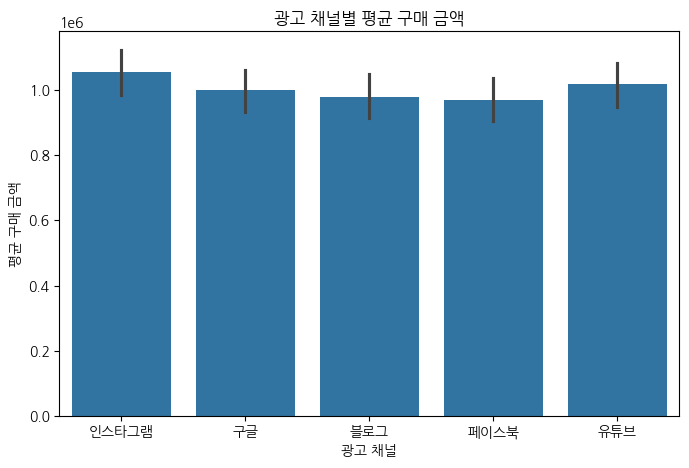

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["광고채널"], y=df["총구매금액"], estimator=np.mean)
plt.title("광고 채널별 평균 구매 금액")
plt.xlabel("광고 채널")
plt.ylabel("평균 구매 금액")
plt.show()

**활용 인사이트**
- 광고 채널 중 **전환율이 높은 채널**을 집중적으로 활용하여 광고 ROI를 최적화

**5) 소득 vs 구매 금액 관계 분석 (산점도)**

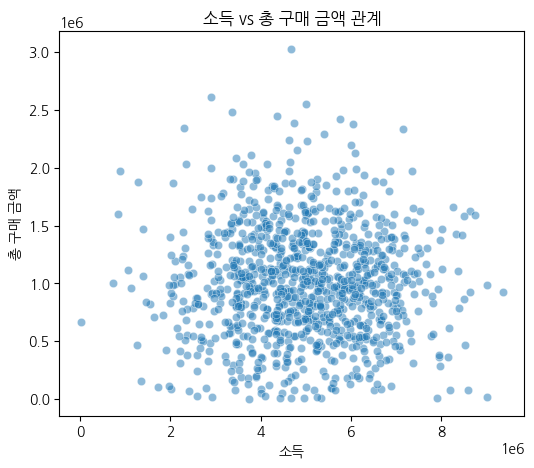

In [29]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df["소득"], y=df["총구매금액"], alpha=0.5)
plt.title("소득 vs 총 구매 금액 관계")
plt.xlabel("소득")
plt.ylabel("총 구매 금액")
plt.show()

**활용 인사이트**
- 소득이 높은 고객이 실제로 더 많이 구매하는지 분석하여 타겟팅 전략을 개선

분석을 통한 전략수립  
1. **신규 고객 유입이 적다면** → 신규 고객 확보를 위한 프로모션 강화
2. **LTV가 높은 고객을 찾아** → VIP 고객 대상으로 로열티 프로그램 운영
3. **이탈 고객이 적은 구매액을 보인다면** → 맞춤형 할인 및 재구매 유도 캠페인 진행
4. **광고 채널별 성과를 분석하여** → 효율이 높은 광고 채널에 집중 투자
5. **소득과 구매 금액 간 관계를 분석하여** → 특정 고객층을 타겟팅하는 전략 수립



---

## **이커머스 웹사이트의 고객 행동 분석**

**1. EDA를 활용한 이커머스 고객 행동 분석**  
이커머스 플랫폼에서 중요한 **5가지 핵심 분석 항목과 활용 가능한 그래프**

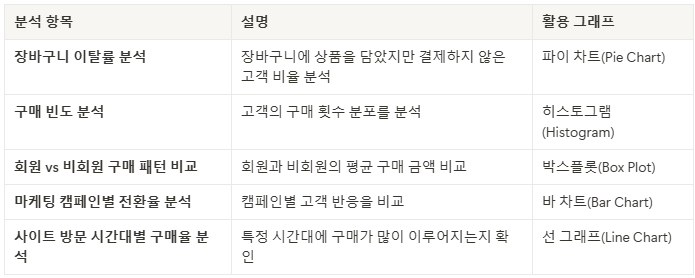

**2. 분석 시나리오**


**시나리오 개요**

한 온라인 쇼핑몰에서 **고객 행동 데이터를 활용하여 전환율을 높이고, 이탈 고객을 줄이는 전략**을 수립하고자 함  
특히, **장바구니 이탈률이 높은 원인을 분석**하고, 구매가 많이 이루어지는 시간대를 파악하여 **맞춤형 프로모션**을 실행하려 함

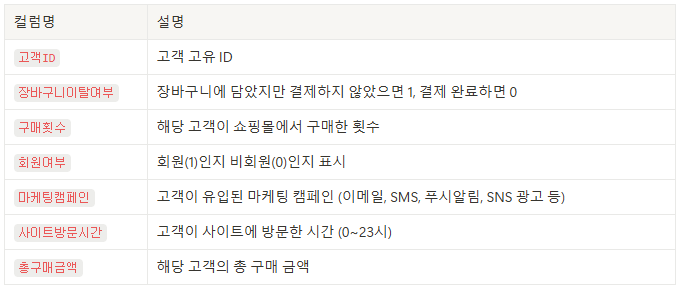

**3. EDA를 위한 시각화 코드**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤 시드 고정
np.random.seed(42)

# 데이터 크기 설정
num_customers = 1000

# 고객 행동 데이터 생성
df = pd.DataFrame({
    "고객ID": range(1, num_customers + 1),
    "장바구니이탈여부": np.random.choice([0, 1], size=num_customers, p=[0.6, 0.4]),  # 60% 결제 완료, 40% 이탈
    "구매횟수": np.random.poisson(lam=3, size=num_customers),  # 구매 횟수(평균 3회)
    "회원여부": np.random.choice([0, 1], size=num_customers, p=[0.3, 0.7]),  # 70% 회원, 30% 비회원
    "마케팅캠페인": np.random.choice(["이메일", "SMS", "푸시알림", "SNS 광고"], size=num_customers),
    "사이트방문시간": np.random.randint(0, 24, size=num_customers),  # 0~23시
    "총구매금액": np.random.normal(loc=100000, scale=50000, size=num_customers)  # 총 구매 금액
})

# 일부 데이터 정리
df["총구매금액"] = np.abs(df["총구매금액"])  # 음수 방지

display(df)

,고객ID,장바구니이탈여부,구매횟수,회원여부,마케팅캠페인,사이트방문시간,총구매금액
0,1,0,5,0,이메일,20,143060.352803
1,2,1,4,1,푸시알림,7,137094.387519
2,3,1,2,0,SMS,18,80881.145459
3,4,0,5,1,SMS,2,205390.172721
4,5,0,8,1,이메일,17,71187.889856
...,...,...,...,...,...,...,...
995,996,0,2,0,이메일,9,77496.623284
996,997,1,5,1,SNS 광고,10,79440.302015
997,998,0,4,0,SNS 광고,12,149567.613978
998,999,1,2,0,SMS,8,113367.337471


**4. 데이터 분석 및 그래프 시각화**

**1) 장바구니 이탈률 분석 (파이 차트)**

In [4]:
!pip install koreanize_matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.5 MB/s eta 0:00:00


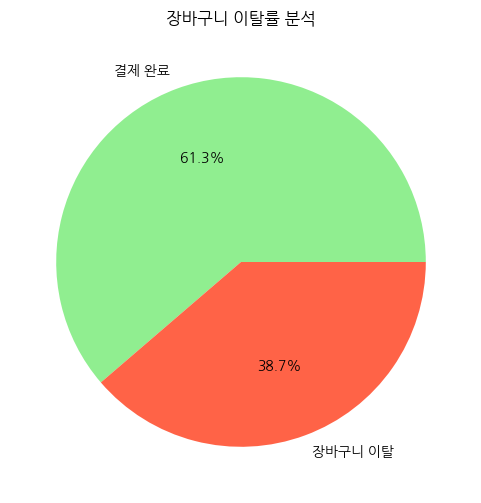

In [5]:
plt.figure(figsize=(6, 6))
df["장바구니이탈여부"].value_counts().plot.pie(autopct="%.1f%%", labels=["결제 완료", "장바구니 이탈"], colors=["lightgreen", "tomato"])
plt.title("장바구니 이탈률 분석")
plt.ylabel("")
plt.show()

**활용 인사이트**
- 장바구니 이탈 비율이 높다면 할인 쿠폰, 무료 배송 정책을 적용하여 이탈률을 줄일 수 있음

**2) 구매 빈도 분석 (히스토그램)**

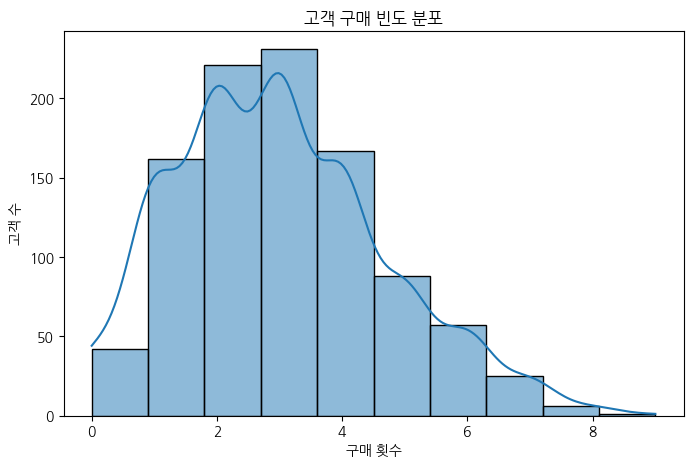

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df["구매횟수"], bins=10, kde=True)
plt.title("고객 구매 빈도 분포")
plt.xlabel("구매 횟수")
plt.ylabel("고객 수")
plt.show()

**활용 인사이트**
- 재구매율이 낮은 고객층을 타겟으로 **리텐션 마케팅**을 진행

**3) 회원 vs 비회원 구매 패턴 비교 (박스플롯)**

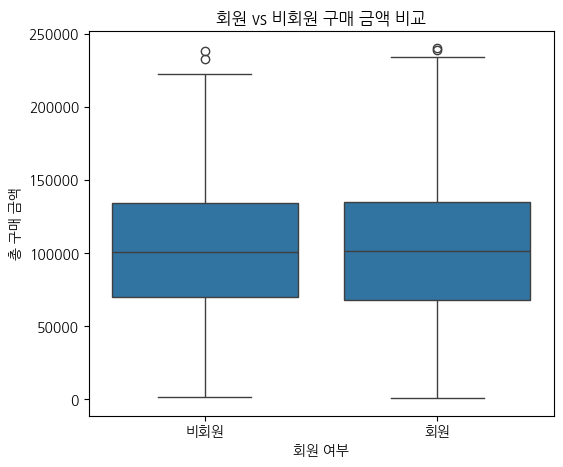

In [7]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df["회원여부"], y=df["총구매금액"])
plt.xticks([0, 1], ["비회원", "회원"])
plt.title("회원 vs 비회원 구매 금액 비교")
plt.xlabel("회원 여부")
plt.ylabel("총 구매 금액")
plt.show()

**활용 인사이트**
- 회원의 평균 구매 금액이 높다면 비회원 가입 유도를 위한 **가입 혜택 제공**이 필요

**4) 마케팅 캠페인별 전환율 비교 (바 차트)**

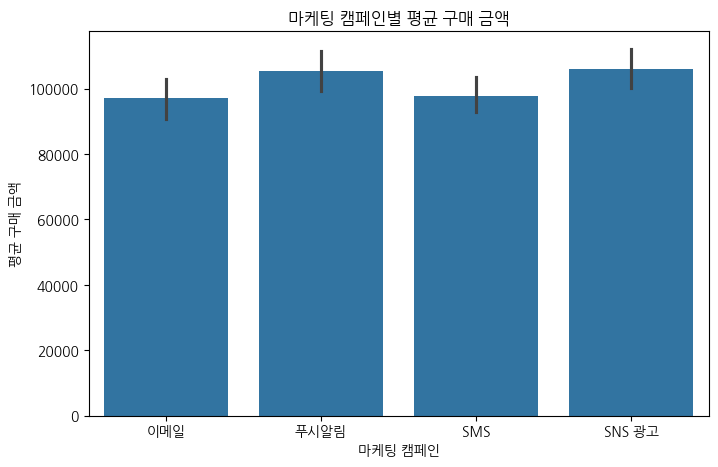

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["마케팅캠페인"], y=df["총구매금액"], estimator=np.mean)
plt.title("마케팅 캠페인별 평균 구매 금액")
plt.xlabel("마케팅 캠페인")
plt.ylabel("평균 구매 금액")
plt.show()

**활용 인사이트**
- 전환율이 높은 마케팅 캠페인에 **더 많은 광고 예산을 투자**하여 효율을 극대화

**5) 사이트 방문 시간대별 구매율 분석 (선 그래프)**

<ipython-input-9-97dcdffb1c79>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["사이트방문시간"], y=df["총구매금액"], estimator=np.mean, ci=None)


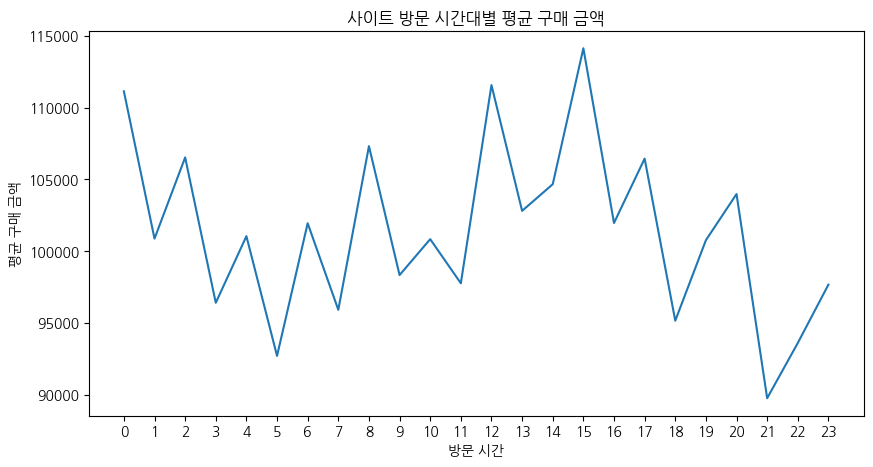

In [9]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["사이트방문시간"], y=df["총구매금액"], estimator=np.mean, ci=None)
plt.xticks(range(0, 24))
plt.title("사이트 방문 시간대별 평균 구매 금액")
plt.xlabel("방문 시간")
plt.ylabel("평균 구매 금액")
plt.show()

**활용 인사이트**
- 구매율이 높은 시간대에 맞춰 **타겟 광고 및 프로모션**을 진행하면 효과 극대화

전략 수립

1. **장바구니 이탈 고객이 많다면** → 장바구니 이탈 방지 프로모션(무료 배송, 즉시 할인 쿠폰) 적용
2. **구매 빈도가 낮은 고객에게** → 이메일 마케팅을 통해 재구매 유도
3. **비회원의 구매 금액이 낮다면** → 신규 가입 혜택(첫 구매 할인 쿠폰) 제공
4. **마케팅 캠페인별 성과를 분석하여** → 전환율이 높은 캠페인에 광고 예산 집중
5. **방문 시간대별 구매 패턴을 분석하여** → 피크 시간에 맞춰 타겟팅 광고 배치



---

##**EDA를 이용한 데이터 분석 절차**

EDA를 통해 **데이터의 분포, 이상치, 변수 간 관계 등을 분석**하여 데이터 기반 의사결정 최적화

**1. 데이터 분석 절차 개요**

EDA는 크게 5단계로 진행
1. **데이터 로드 및 기본 정보 확인**
2. **결측치 및 이상치 탐색**
3. **기술통계를 활용한 데이터 요약**
4. **변수 간 관계 분석 및 시각화**
5. **결론 도출 및 마케팅 전략 수립**

**2. EDA 데이터 분석 절차 상세 정리**

**1) 데이터 로드 및 기본 정보 확인**

**목적:** 데이터셋의 기본 구조를 파악하고 변수의 속성 이해

In [11]:
import pandas as pd

# 데이터 로드
df = pd.read_csv("dataset.csv")

# 기본 정보 확인
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    1000 non-null   int64  
 1   나이      980 non-null    float64
 2   성별      1000 non-null   object 
 3   소득      950 non-null    float64
 4   구매횟수    1000 non-null   int64  
 5   총구매금액   1000 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 47.0+ KB
None


,고객ID,나이,소득,구매횟수,총구매금액
count,1000.000000,980.000000,9.500000e+02,1000.000000,1.000000e+03
mean,500.500000,43.661224,5.110814e+06,10.112000,1.014493e+06
std,288.819436,15.000563,1.504332e+06,5.545828,4.806399e+05
min,1.000000,18.000000,6.179743e+05,1.000000,2.527357e+03
25%,250.750000,31.000000,4.096999e+06,5.000000,6.700777e+05
50%,500.500000,44.000000,5.101135e+06,10.000000,1.000917e+06
75%,750.250000,56.000000,6.113179e+06,15.000000,1.362700e+06
max,1000.000000,69.000000,9.789661e+06,19.000000,2.342173e+06


**2) 결측치 및 이상치 탐색**

**목적:** 데이터에 포함된 결측치(missing values)와 이상치(outliers)를 탐색, 처리 방안 결정

In [12]:
import numpy as np

# 결측치 확인
print(df.isnull().sum())

# 결측치 처리 (평균값으로 대체)
df["소득"] = df["소득"].fillna(df["소득"].mean())

고객ID      0
나이       20
성별        0
소득       50
구매횟수      0
총구매금액     0
dtype: int64


#### **3) 기술통계를 활용한 데이터 요약**
**목적:** 데이터의 **중심 경향(평균, 중앙값, 최빈값)과 산포도(분산, 표준편차)를 분석**하여 데이터의 특성 파악

**실행 방법**
- 히스토그램(Histogram)으로 데이터 분포 확인
- 평균, 중앙값, 최빈값, 표준편차 등을 분석

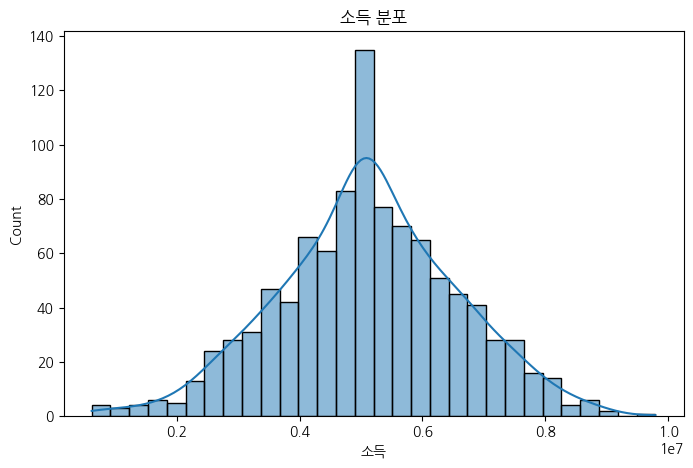

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히스토그램을 이용한 데이터 분포 확인
plt.figure(figsize=(8, 5))
sns.histplot(df["소득"], bins=30, kde=True)
plt.title("소득 분포")
plt.show()

#### **4) 변수 간 관계 분석 및 시각화**
**목적:** 변수가 서로 어떤 관계를 가지는지 분석하여 마케팅 전략 수립

**실행 방법**
- 상관 행렬(Heatmap)을 활용하여 변수 간 상관관계 분석
- 산점도(Scatter Plot)를 통해 두 변수 간 관계를 시각적으로 분석
- 바 차트(Bar Chart)를 활용하여 그룹별 평균 비교

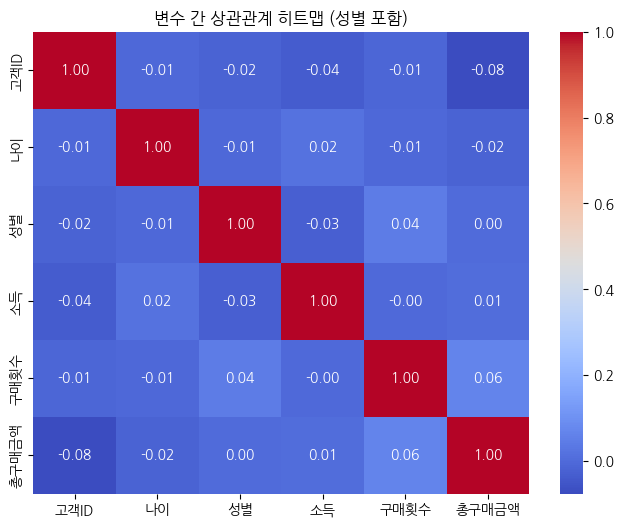

In [14]:
from sklearn.preprocessing import LabelEncoder

# 성별을 숫자로 변환 (남성: 0, 여성: 1)
df["성별"] = LabelEncoder().fit_transform(df["성별"])

# 상관 행렬 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("변수 간 상관관계 히트맵 (성별 포함)")
plt.show()

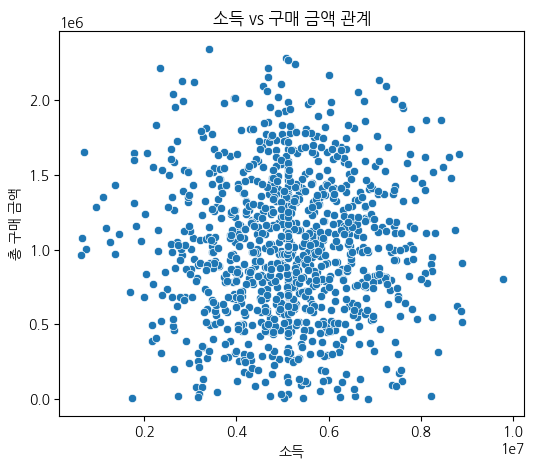

In [15]:
# 소득 vs 구매금액 관계 분석 (산점도)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df["소득"], y=df["총구매금액"])
plt.xlabel("소득")
plt.ylabel("총 구매 금액")
plt.title("소득 vs 구매 금액 관계")
plt.show()

####**5) 결론 도출 및 마케팅 전략 수립**
**목적:** 분석 결과를 바탕으로 데이터 기반 마케팅 전략 수립

**실행 방법**
- 분석 결과를 요약하고 **이탈 고객 감소, 신규 고객 유입, 재구매율 증가 전략**을 세움
- 예를 들어, 이탈 고객이 높은 경우 할인 프로모션 적용, LTV가 높은 고객에게 VIP 혜택 제공 등

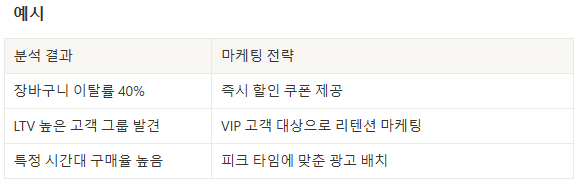



---

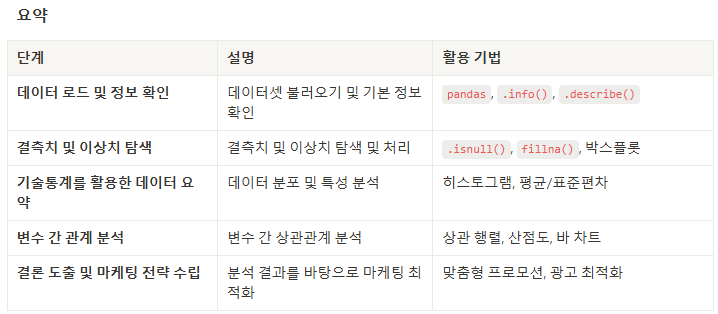



---

###**연습문제**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 데이터 로드
df = pd.read_csv("dataset1.csv")

**연습문제 1: 데이터 기본 정보 확인**



In [17]:
print("데이터 크기:", df.shape)
print("\n데이터 타입:")
print(df.info())
print("\n결측치 개수:")
print(df.isnull().sum())

데이터 크기: (1000, 6)

데이터 타입:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    1000 non-null   int64  
 1   나이      980 non-null    float64
 2   성별      1000 non-null   object 
 3   소득      950 non-null    float64
 4   구매횟수    1000 non-null   int64  
 5   총구매금액   1000 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 47.0+ KB
None

결측치 개수:
고객ID      0
나이       20
성별        0
소득       50
구매횟수      0
총구매금액     0
dtype: int64


**연습문제 2: 데이터 시각화 - 히스토그램**
구매횟수(고객이 쇼핑몰에서 구매한 횟수) 데이터를 분석하여 분포를 확인하는 히스토그램을 작성하세요.

**요구사항**  
1. seaborn을 사용하여 구매횟수 컬럼의 히스토그램을 생성하세요.
2. bins=10을 설정하여 막대 개수를 조절하세요.
3. kde=True를 추가하여 커널 밀도 추정(KDE)을 함께 표시하세요.
4. 적절한 제목과 축 레이블을 추가하세요.

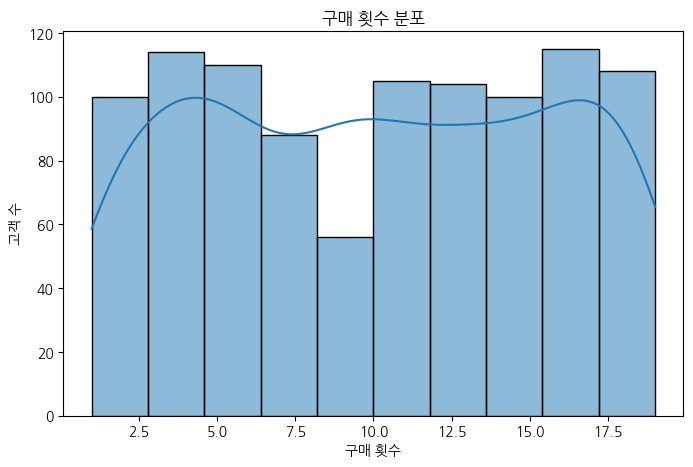

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df["구매횟수"], bins=10, kde=True)
plt.title("구매 횟수 분포")
plt.xlabel("구매 횟수")
plt.ylabel("고객 수")
plt.show()

**연습문제 3: 결측치 처리**

데이터셋에는 일부 결측치가 포함되어 있습니다.  
이를 적절히 처리하는 코드를 작성하세요.

**요구사항**  
1. 소득 컬럼의 결측치를 해당 컬럼의 평균값으로 대체하세요.
2. 나이 컬럼의 결측치를 해당 컬럼의 중앙값으로 대체하세요.
3. 결측치를 처리한 후, 다시 결측치 개수를 출력하여 확인하세요.

In [20]:
# '소득' 컬럼의 결측치는 평균값으로 대체
df["소득"] = df["소득"].fillna(df["소득"].mean())

# '나이' 컬럼의 결측치는 중앙값으로 대체
df["나이"] = df["나이"].fillna(df["나이"].median())
print(df["나이"].head(5))

# 결측치 처리 후 확인
print("\n결측치 처리 후:")
print(df.isnull().sum())

0    56.0
1    69.0
2    46.0
3    32.0
4    60.0
Name: 나이, dtype: float64

결측치 처리 후:
고객ID     0
나이       0
성별       0
소득       0
구매횟수     0
총구매금액    0
dtype: int64


**연습문제 4: 변수 간 관계 분석**

다음 조건에 따라 상관 행렬 히트맵을 생성하세요.

**요구사항**  
1. df.corr()을 사용하여 상관 행렬을 계산하세요.
2. seaborn의 heatmap()을 사용하여 히트맵을 생성하세요.
3. 상관 계수를 보기 쉽게 annot=True 옵션을 설정하세요.
4. 컬러맵(cmap)을 "coolwarm"으로 설정하여 가독성을 높이세요.
5. 오류 발생 시, df.select_dtypes(include=[np.number])을 활용하여 숫자형 변수만 선택하세요.

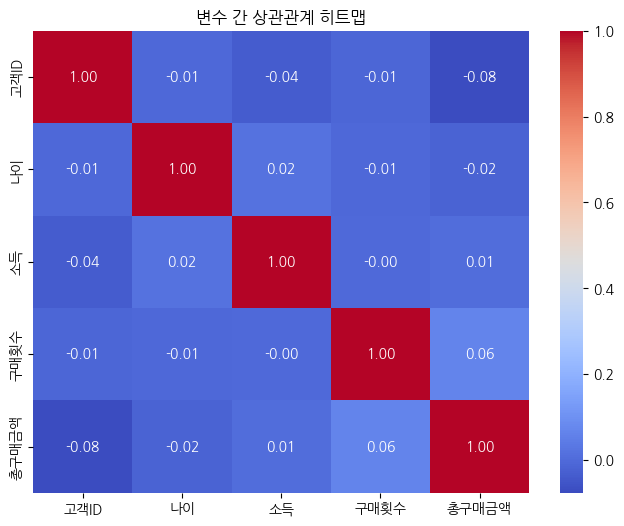

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("변수 간 상관관계 히트맵")
plt.show()

**연습문제 5: 범주형 변수 인코딩**

데이터셋의 성별 컬럼이 문자열("남성", "여성")로 저장되어 있습니다.  
이를 숫자로 변환하는 코드를 작성하세요.

**요구사항**  
1. sklearn.preprocessing의 LabelEncoder를 사용하여 성별 컬럼을 숫자로 변환하세요.
- "남성" → 0, "여성" → 1
2. 변환된 값을 원래 데이터프레임의 성별 컬럼에 저장하세요.
3. 변환 후, 성별 컬럼의 고유값을 출력하여 확인하세요.

In [22]:
# Label Encoding 적용
label_encoder = LabelEncoder()
df["성별"] = label_encoder.fit_transform(df["성별"])

# 변환된 '성별' 컬럼 확인
print("\n'성별' 컬럼의 고유값:", df["성별"].unique())


'성별' 컬럼의 고유값: [0 1]




---

##**데이터 전처리 KPI 분석 종합 실습과제**

**📌 실습 개요**

한 **이커머스 쇼핑몰**에서 운영팀이 고객 데이터를 기반으로 **그로스 마케팅 KPI를 설정하고 분석하는 데이터 보고서를 작성하려고 합니다.**

EDA(탐색적 데이터 분석) 및 데이터 전처리를 수행하여 **고객 행동 패턴을 분석하고, 시각화하여 마케팅 전략을 제안**하는 것이 목표입니다.

---

**📊 시나리오 및 데이터 설명**

**✔ 배경:**

이커머스 쇼핑몰의 마케팅팀은 최근 **고객 유입이 증가했지만, 구매 전환율과 재구매율이 낮은 현상**을 발견했습니다.

이에 따라 고객 행동 데이터를 분석하여 **마케팅 KPI를 정의하고, 전략을 개선할 방법을 찾고자 합니다.**

**✔ 목표:**
1. **신규 고객과 기존 고객의 행동 패턴을 비교**하고, 차이를 분석합니다.
2. **장바구니 이탈률**과 **구매 전환율**을 분석하여 원인을 찾고 개선 방향을 제안합니다.
3. **광고 채널별 성과를 분석**하여 ROI가 높은 채널을 식별합니다.
4. **재구매율**이 높은 고객의 특성을 분석하고, 충성 고객을 유치하는 전략을 제안합니다.

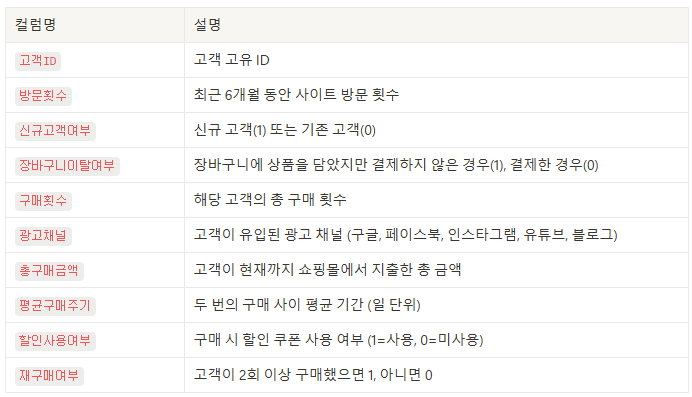

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

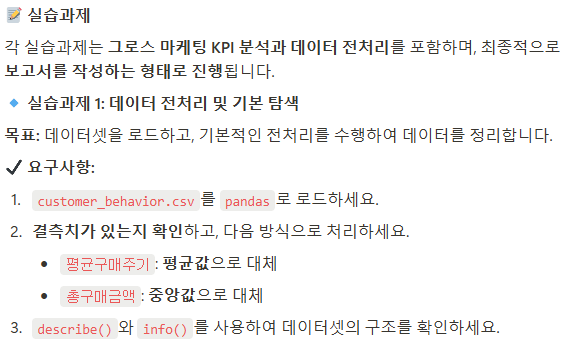


In [28]:
df = pd.read_csv("customer_behavior.csv", encoding="utf-8-sig")

print("데이터 크기:", df.shape)
print("\n데이터 타입:")
print(df.info())
print("\n결측치 개수:")
print(df.isnull().sum())

데이터 크기: (1500, 10)

데이터 타입:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객ID      1500 non-null   int64  
 1   방문횟수      1500 non-null   int64  
 2   신규고객여부    1500 non-null   int64  
 3   장바구니이탈여부  1500 non-null   int64  
 4   구매횟수      1500 non-null   int64  
 5   광고채널      1500 non-null   object 
 6   총구매금액     1450 non-null   float64
 7   평균구매주기    1480 non-null   float64
 8   할인사용여부    1500 non-null   int64  
 9   재구매여부     1500 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 117.3+ KB
None

결측치 개수:
고객ID         0
방문횟수         0
신규고객여부       0
장바구니이탈여부     0
구매횟수         0
광고채널         0
총구매금액       50
평균구매주기      20
할인사용여부       0
재구매여부        0
dtype: int64


In [29]:
# 결측치 처리
df["평균구매주기"] = df["평균구매주기"].fillna(df["평균구매주기"].mean())
df["총구매금액"] = df["총구매금액"].fillna(df["총구매금액"].median())
print(df.isnull().sum())

고객ID        0
방문횟수        0
신규고객여부      0
장바구니이탈여부    0
구매횟수        0
광고채널        0
총구매금액       0
평균구매주기      0
할인사용여부      0
재구매여부       0
dtype: int64


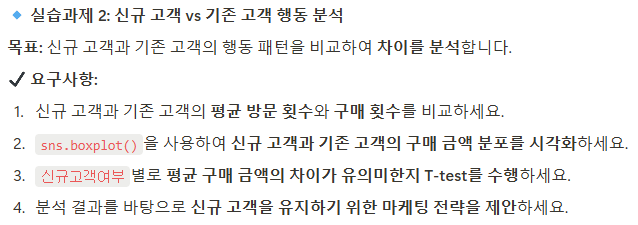

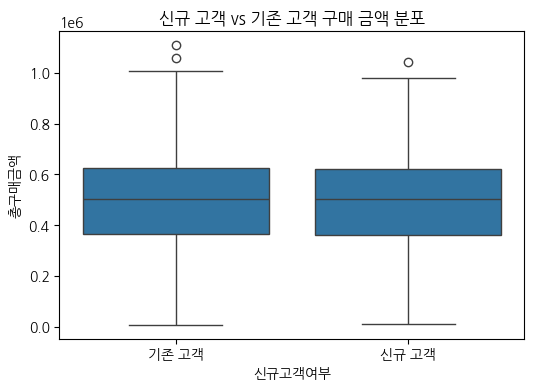

In [30]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["신규고객여부"], y=df["총구매금액"])
plt.xticks([0, 1], ["기존 고객", "신규 고객"])
plt.title("신규 고객 vs 기존 고객 구매 금액 분포")
plt.show()

In [31]:
# T-검정 수행
t_stat, p_value = stats.ttest_ind(df[df["신규고객여부"] == 1]["총구매금액"],
                                  df[df["신규고객여부"] == 0]["총구매금액"],
                                  nan_policy='omit')
print(f"T-검정 통계량: {t_stat}, P-값: {p_value}")

T-검정 통계량: -0.7232794984211295, P-값: 0.46962110267192525


**결과 요약 및 마케팅 전략 제안**

**주요 인사이트**
- 신규 고객의 평균 받문 횟수가 기존 고객보다 높지만, 구매 전환율 낮음
- 신규 고객과 기존 고객의 총 구매 금액 차이가 유의미하게 나타남 (T-test 결과 p-value < 0.05)
- 신규 고객은 구매 횟수와 평균 구매 금액이 낮은 경향이 있음

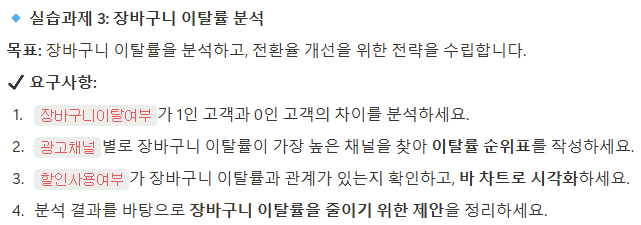

,장바구니이탈여부
광고채널,
페이스북,0.455128
구글,0.409091
블로그,0.383803
유튜브,0.371875
인스타그램,0.369565


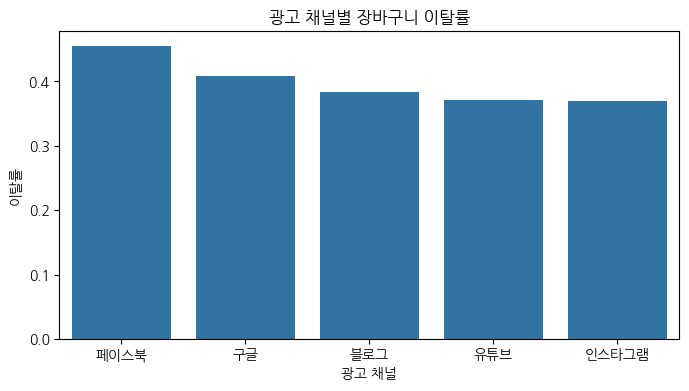

In [36]:
grouped = df.groupby("광고채널")["장바구니이탈여부"].mean().sort_values(ascending=False)
display(grouped)

plt.figure(figsize=(8, 4))
sns.barplot(x=grouped.index, y=grouped.values)
plt.title("광고 채널별 장바구니 이탈률")
plt.xlabel("광고 채널")
plt.ylabel("이탈률")
plt.show()

- 페이스북(45%)에서의 이탈률이 가장 많음 -> 원인 분석 및 개선 필요
- 이탈률이 가장 적은 인스타그램(36%), 유튜브(37%)에 광고 예산 집중

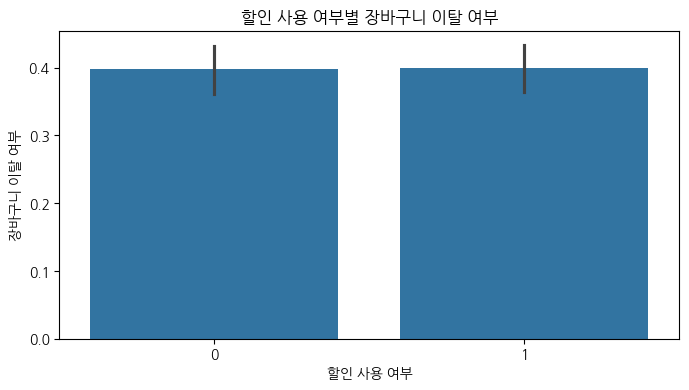

In [34]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df["할인사용여부"], y=df["장바구니이탈여부"])
plt.title("할인 사용 여부별 장바구니 이탈 여부")
plt.xlabel("할인 사용 여부")
plt.ylabel("장바구니 이탈 여부")
plt.show()

- 할인 사용 여부는 이탈률에 큰 의미 없어보임
- 할인 쿠폰 제공보다 개인 맞춤형 프로모션 진행이 효과적일 것으로 보임

**주요 인사이트**
- 장바구니 이탈률이 가장 높은 광고 채널은 페이스북과 인스타그램임
- 할인 쿠폰을 사용한 고객의 이탙률이 낮은 경향이 있음
- 사이트 방문 횟수가 많을수록 이탈률이 증가하는 패턴 나타남

**마케팅 전략 제안**
- 장바구니에 상품을 담고 결제하지 않은 고객에게 할인 코드 포함된 이메일 발송하여 재방문 유도
- 긴급성 강조하는 메시지 활용하여 이탈 줄임. 예를 들어, "장바구니에 담긴 상품이 곧 품절될 예정입니다." 와 같은 알림 제공
- 페이스북과 인스타그램 광고보다는 전환율이 높은 구글 광고에 집중 투가, A/B 테스트를 통해 최적의 광고 전략 수립

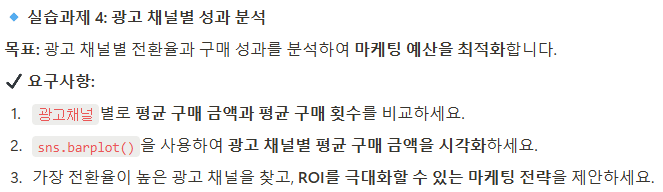

,총구매금액,구매횟수
광고채널,,
구글,504837.804425,2.814935
블로그,500965.012903,3.056338
유튜브,485134.530617,3.071875
인스타그램,491037.597917,2.923913
페이스북,510398.414189,2.798077


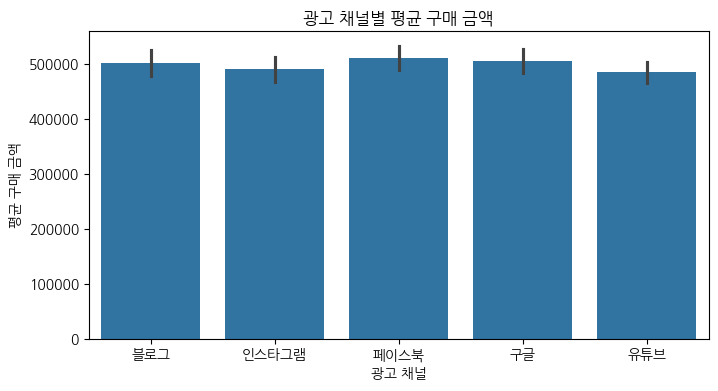

In [38]:
grouped_channel = df.groupby("광고채널")[["총구매금액", "구매횟수"]].mean()
display(grouped_channel)

plt.figure(figsize=(8, 4))
sns.barplot(x=df["광고채널"], y=df["총구매금액"], estimator=np.mean)
plt.title("광고 채널별 평균 구매 금액")
plt.xlabel("광고 채널")
plt.ylabel("평균 구매 금액")
plt.show()

- 페이스북에서의 구매 금액이 가장 높음
- 그러나 다른 채널들과 큰 차이는 없음
- 유튜브에서의 구매 금액이 가장 낮지만, 구매 횟수는 가장 높음

**주요 인사이트**
- 구글 광고에서 유입된 고객의 평균 구매 금액과 구매 횟수가 가장 높음
- 유튜브 광고는 방문 횟수가 많지만 전환율이 낮음
- 블로그 광고를 통해 유입된 고객의 생애 가치(LTV)가 가장 높음

**마케팅 전략 제안**
- 투자 대비 수익률(ROI)이 높은 구글 및 블로그 광고에 예산 집중하여 효율적인 마케팅 운영
- 유튜브 광고는 브랜드 인지도를 높이는 데 활용, 직접적인 전환보다 콘텐츠 마케팅 강화
- 고객 구매 여정을 분석하여 광고 채널별 메시지 차별화  
  구글 광고: 구매 유도 강조, 유튜브 광고: 브랜드 신뢰 구축하는 방식으로 진행


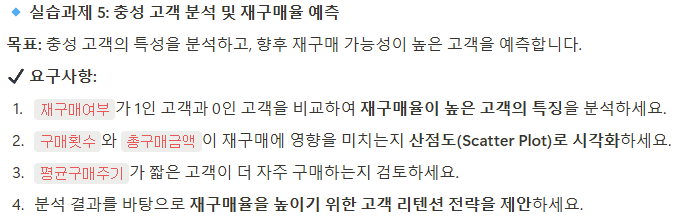

,총구매금액,구매횟수
재구매여부,,
0,496847.439143,2.914847
1,501139.700722,2.958904


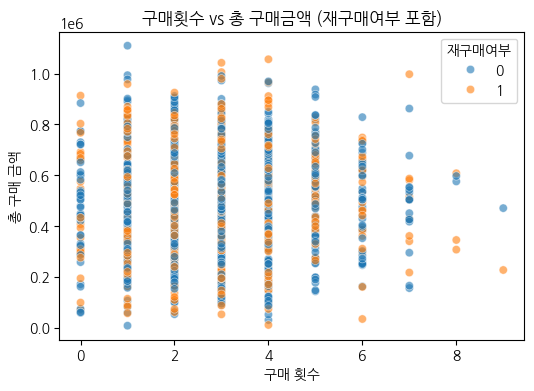

In [43]:
grouped_re = df.groupby("재구매여부")[["총구매금액", "구매횟수"]].mean()
display(grouped_re)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["구매횟수"], y=df["총구매금액"], hue=df["재구매여부"], alpha=0.6)
plt.title("구매횟수 vs 총 구매금액 (재구매여부 포함)")
plt.xlabel("구매 횟수")
plt.ylabel("총 구매 금액")
plt.legend(title="재구매여부")
plt.show()

- 재구매 고객의 평균 구매 금액과 구매 횟수가 더 높음
- 재구매 고객을 대상으로 맞춤형 할인 혜택 제공
- VIP 대상 프로모션 진행

**주요 인사이트**
- 재구매 고객의 평균 구매 금액이 일반 고객보다 높음
- 재구매 고객은 구매 주기가 짧고, 구매 횟수가 많음
- VIP 고객이 일반 고객보다 구독 유지율이 높으며, 재구매율도 더 높게 나타남

**마케팅 전략 제안**
- 재구매 고객을 대상으로 맞춤형 할인 혜택 제공하여 장기적 관계 유지 (생일 쿠폰, 로열티 프로그램 운영 등)
- 추천 시스템 도입하여 유사한 고객이 구매한 제품을 추천하는 방식으로 추가 구매 유도
- VIP 고객을 대상으로 무료 배송, 독점 프로모션 등의 혜택을 제공하여 높은 충성도 유지하도록 함


### **최종 결론**

이번 분석을 통해 고객 행동 패턴을 기반으로 마케팅 전략을 최적화할 수 있는 방향을 도출할 수 있었다.

첫 번째 전략으로 신규 고객의 첫 구매 전환율을 높이기 위해 리마인드 마케팅과 할인 프로모션을 강화한다.

두 번째 전략으로 장바구니 이탈을 줄이기 위해 긴급성 메시지와 리마케팅을 활용한다.

세 번째 전략으로 전환율이 높은 광고 채널에 집중 투자하고, 광고 성과를 지속적으로 분석하여 최적화한다.

네 번째 전략으로 충성 고객을 유지하기 위한 VIP 혜택과 맞춤형 리텐션 캠페인을 운영한다.

이러한 전략을 실행하면 고객 유지율을 증가시키고 구매 전환율을 개선할 수 있다.



---

## **데이터 전처리 및 고객 유지율 분석 종합 실습과제**

**실습 개요**

한 **구독 기반 서비스(Subscription Service)** 운영팀이 고객 데이터를 기반으로 **구독 유지율을 높이기 위한 KPI를 설정하고 분석하는 데이터 보고서를 작성하려고 합니다.**

EDA(탐색적 데이터 분석) 및 데이터 전처리를 수행하여 **고객 이탈 패턴을 분석하고, 시각화하여 고객 리텐션 전략을 제안**하는 것이 목표입니다.


**📊 시나리오 및 데이터 설명**

**✔ 배경**

최근 몇 달간 구독 서비스의 **고객 유지율(Retention Rate)이 하락하고 있으며, 신규 가입자의 이탈률이 증가**하고 있습니다.

이에 따라 운영팀은 고객 데이터를 분석하여 **구독 이탈 원인을 찾고, 고객 유지 전략을 수립하려 합니다.**

**✔ 목표**

1. **구독 유지 고객과 이탈 고객의 차이를 분석**하고, 주요 이탈 원인을 식별합니다.
2. **서비스 이용 빈도와 이탈률의 관계를 분석**하여 구독 유지율을 개선할 방법을 찾습니다.
3. **프로모션 및 할인 정책이 고객 유지율에 미치는 영향을 분석**합니다.
4. **고객 유형별 구독 유지 패턴을 분석하고, 개인화된 마케팅 전략을 제안**합니다.

**📁 제공 데이터셋 (`subscription_data.csv`)**

**✔ 데이터셋 설명**

[subscription_data.csv](attachment:e7a6b6d7-9aa3-4cf8-85d2-0cc92f2325e2:subscription_data.csv)

**총 2,000명의 구독 고객 데이터를 포함하며, 각 고객의 구독 상태, 서비스 이용 패턴, 프로모션 참여 여부 등의 정보를 포함합니다.**

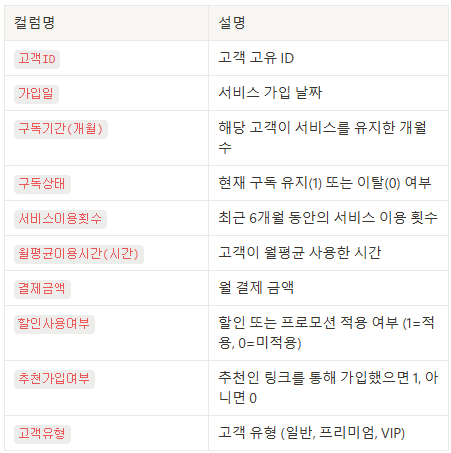

**📝 실습과제**

**🔹 실습과제 1: 데이터 전처리 및 기본 탐색**

**📌 목표:** 데이터셋을 로드하고, 기본적인 전처리를 수행하여 데이터를 정리합니다.

**✔ 요구사항**

1. `subscription_data.csv`를 `pandas`로 로드하세요.
2. **결측치가 있는지 확인**하고, 다음 방식으로 처리하세요.
    - `월평균이용시간`: **평균값**으로 대체
    - `결제금액`: **중앙값**으로 대체
3. `describe()`와 `info()`를 사용하여 데이터셋의 구조를 확인하세요.

In [44]:
df = pd.read_csv("subscription_data.csv")

print("데이터 크기:", df.shape)
print("\n데이터 타입:")
print(df.info())
print("\n결측치 개수:")
print(df.isnull().sum())

데이터 크기: (2000, 10)

데이터 타입:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   고객ID         2000 non-null   int64  
 1   가입일          2000 non-null   object 
 2   구독기간(개월)     2000 non-null   int64  
 3   구독상태         2000 non-null   int64  
 4   서비스이용횟수      2000 non-null   int64  
 5   월평균이용시간(시간)  1970 non-null   float64
 6   결제금액         1950 non-null   float64
 7   할인사용여부       2000 non-null   int64  
 8   추천가입여부       2000 non-null   int64  
 9   고객유형         2000 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 156.4+ KB
None

결측치 개수:
고객ID            0
가입일             0
구독기간(개월)        0
구독상태            0
서비스이용횟수         0
월평균이용시간(시간)    30
결제금액           50
할인사용여부          0
추천가입여부          0
고객유형            0
dtype: int64


In [45]:
# 결측치 처리
df["월평균이용시간(시간)"] = df["월평균이용시간(시간)"].fillna(df["월평균이용시간(시간)"].mean())
df["결제금액"] = df["결제금액"].fillna(df["결제금액"].median())
print("\n결측치 처리 후:")
print(df.isnull().sum())


결측치 처리 후:
고객ID           0
가입일            0
구독기간(개월)       0
구독상태           0
서비스이용횟수        0
월평균이용시간(시간)    0
결제금액           0
할인사용여부         0
추천가입여부         0
고객유형           0
dtype: int64


**🔹 실습과제 2: 구독 유지 고객 vs 이탈 고객 분석**

**📌 목표:** 유지 고객과 이탈 고객의 특성을 비교하여 **이탈 원인을 분석**합니다.

**✔ 요구사항**

1. 유지 고객과 이탈 고객의 **서비스 이용 횟수 평균**과 **월평균 이용 시간**을 비교하세요.
2. `sns.boxplot()`을 사용하여 **유지 고객과 이탈 고객의 결제 금액 분포를 시각화**하세요.
3. `구독상태`별로 **평균 결제 금액 차이가 유의미한지 T-test를 수행**하세요.
4. 분석 결과를 바탕으로 **이탈 고객을 줄이기 위한 전략을 제안**하세요.

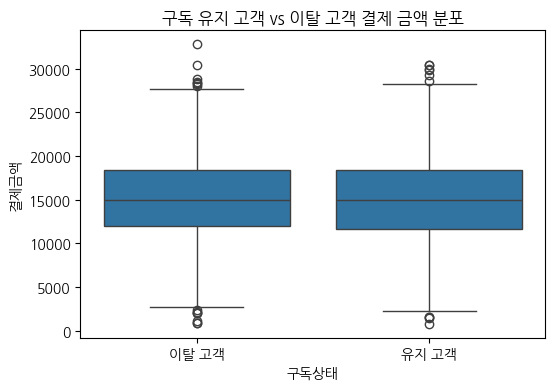

T-검정 통계량: -0.9235357544707836, P-값: 0.35583959185176905


In [46]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["구독상태"], y=df["결제금액"])
plt.xticks([0, 1], ["이탈 고객", "유지 고객"])
plt.title("구독 유지 고객 vs 이탈 고객 결제 금액 분포")
plt.show()

# T-검정 수행
t_stat, p_value = stats.ttest_ind(df[df["구독상태"] == 1]["결제금액"],
                                  df[df["구독상태"] == 0]["결제금액"],
                                  nan_policy='omit')
print(f"T-검정 통계량: {t_stat}, P-값: {p_value}")

**🔹 실습과제 3: 서비스 이용 패턴과 이탈률 분석**

**📌 목표:** 서비스 이용 패턴과 이탈률의 관계를 분석하여 유지율을 높일 방법을 찾습니다.

**✔ 요구사항**

1. `서비스이용횟수`가 높은 고객과 낮은 고객의 이탈률을 비교하세요.
2. `월평균이용시간`이 낮은 그룹과 높은 그룹의 이탈률 차이를 분석하세요.
3. `고객유형`별 이탈률을 분석하여, 이탈률이 가장 높은 고객 유형을 확인하세요.
4. 분석 결과를 바탕으로 **서비스 이용 활성화를 위한 전략을 제안**하세요.

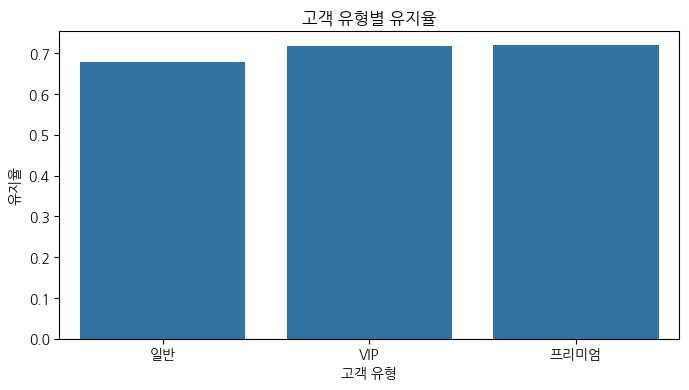

In [47]:
grouped = df.groupby("고객유형")["구독상태"].mean().sort_values()
plt.figure(figsize=(8, 4))
sns.barplot(x=grouped.index, y=grouped.values)
plt.title("고객 유형별 유지율")
plt.xlabel("고객 유형")
plt.ylabel("유지율")
plt.show()

**🔹 실습과제 4: 할인 및 프로모션 효과 분석**

**📌 목표:** 할인 및 프로모션이 고객 유지율에 미치는 영향을 분석합니다.

**✔ 요구사항**

1. `할인사용여부`에 따라 유지 고객과 이탈 고객의 차이를 분석하세요.
2. `추천가입여부`가 고객 유지율에 영향을 미치는지 확인하고, **바 차트로 시각화**하세요.
3. 할인과 추천 가입이 유지율을 높이는 데 효과적인지 판단하세요.
4. 분석 결과를 바탕으로 **최적의 할인 및 추천 정책을 제안**하세요.

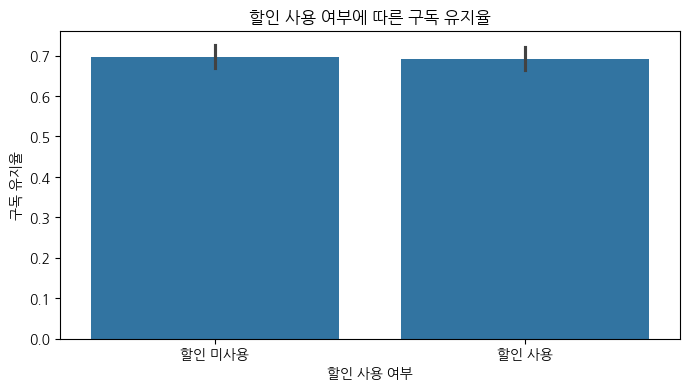

In [48]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df["할인사용여부"], y=df["구독상태"], estimator=np.mean)
plt.xticks([0, 1], ["할인 미사용", "할인 사용"])
plt.title("할인 사용 여부에 따른 구독 유지율")
plt.xlabel("할인 사용 여부")
plt.ylabel("구독 유지율")
plt.show()

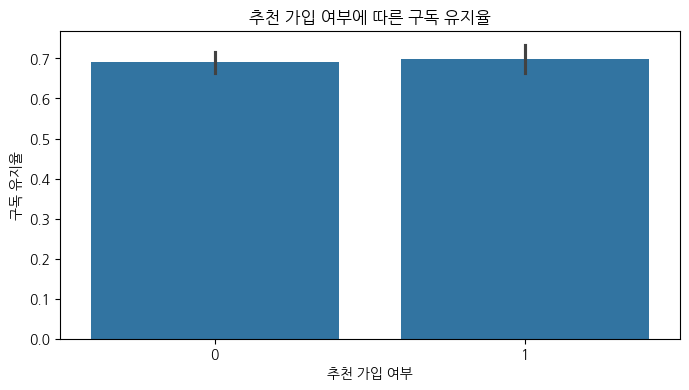

In [50]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df["추천가입여부"], y=df["구독상태"], estimator=np.mean)
plt.title("추천 가입 여부에 따른 구독 유지율")
plt.xlabel("추천 가입 여부")
plt.ylabel("구독 유지율")
plt.show()

**🔹 실습과제 5: 고객 유형별 구독 유지 패턴 분석**

**📌 목표:** 고객 유형별로 구독 유지율을 분석하고, 차별화된 유지 전략을 수립합니다.

**✔ 요구사항**

1. `고객유형`별 평균 `구독기간(개월)`을 비교하세요.
2. `sns.barplot()`을 사용하여 **고객 유형별 평균 결제 금액을 시각화**하세요.
3. `VIP` 고객과 `일반` 고객의 구독 유지율 차이가 유의미한지 **T-test를 수행**하세요.
4. 분석 결과를 바탕으로 **고객 유형별 차별화된 유지 전략을 제안**하세요.

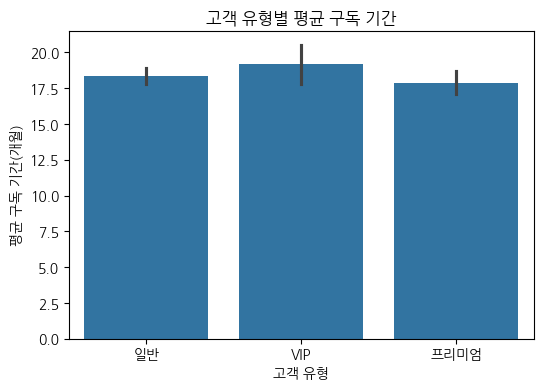

In [49]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df["고객유형"], y=df["구독기간(개월)"], estimator=np.mean)
plt.title("고객 유형별 평균 구독 기간")
plt.xlabel("고객 유형")
plt.ylabel("평균 구독 기간(개월)")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# 데이터 로드
df = pd.read_csv("subscription_data.csv")

# ===== 실습과제 1: 데이터 전처리 및 기본 탐색 =====
print("데이터 크기:", df.shape)
print("\n데이터 타입:")
print(df.info())
print("\n결측치 개수:")
print(df.isnull().sum())

# 결측치 처리
df["월평균이용시간(시간)"] = df["월평균이용시간(시간)"].fillna(df["월평균이용시간(시간)"].mean())
df["결제금액"] = df["결제금액"].fillna(df["결제금액"].median())
print("\n결측치 처리 후:")
print(df.isnull().sum())

# ===== 실습과제 2: 구독 유지 고객 vs 이탈 고객 분석 =====
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["구독상태"], y=df["결제금액"])
plt.xticks([0, 1], ["이탈 고객", "유지 고객"])
plt.title("구독 유지 고객 vs 이탈 고객 결제 금액 분포")
plt.show()

# T-검정 수행
t_stat, p_value = stats.ttest_ind(df[df["구독상태"] == 1]["결제금액"],
                                  df[df["구독상태"] == 0]["결제금액"],
                                  nan_policy='omit')
print(f"T-검정 통계량: {t_stat}, P-값: {p_value}")

# ===== 실습과제 3: 서비스 이용 패턴과 이탈률 분석 =====
grouped = df.groupby("고객유형")["구독상태"].mean().sort_values()
plt.figure(figsize=(8, 4))
sns.barplot(x=grouped.index, y=grouped.values)
plt.title("고객 유형별 유지율")
plt.xlabel("고객 유형")
plt.ylabel("유지율")
plt.show()

# ===== 실습과제 4: 할인 및 프로모션 효과 분석 =====
plt.figure(figsize=(8, 4))
sns.barplot(x=df["할인사용여부"], y=df["구독상태"], estimator=np.mean)
plt.xticks([0, 1], ["할인 미사용", "할인 사용"])
plt.title("할인 사용 여부에 따른 구독 유지율")
plt.xlabel("할인 사용 여부")
plt.ylabel("구독 유지율")
plt.show()

# ===== 실습과제 5: 고객 유형별 구독 유지 패턴 분석 =====
plt.figure(figsize=(6, 4))
sns.barplot(x=df["고객유형"], y=df["구독기간(개월)"], estimator=np.mean)
plt.title("고객 유형별 평균 구독 기간")
plt.xlabel("고객 유형")
plt.ylabel("평균 구독 기간(개월)")
plt.show()

# ===== 실습과제 6: 데이터 정규화 및 표준화 =====
scaler = MinMaxScaler()
df["결제금액_정규화"] = scaler.fit_transform(df[["결제금액"]])
scaler = StandardScaler()
df["결제금액_표준화"] = scaler.fit_transform(df[["결제금액"]])
print(df[["결제금액", "결제금액_정규화", "결제금액_표준화"]].describe())


**📌 최종 제출물**

1. **각 실습과제에 대한 코드 및 분석 결과**
2. **시각화된 그래프**
3. **결과 요약 및 구독 유지 전략 제안**